___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [21]:
df = pd.read_csv("Churn_Modelling.csv")

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [5]:
df2 = df.copy()

In [26]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [8]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [22]:
df.Gender = df.Gender.str.replace("Male", "1")

In [23]:
df.Gender = df.Gender.str.replace("Female", "0")

In [32]:
df.Gender = pd.to_numeric(df.Gender)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


In [52]:
df = pd.get_dummies(df, drop_first=True)

<AxesSubplot:>

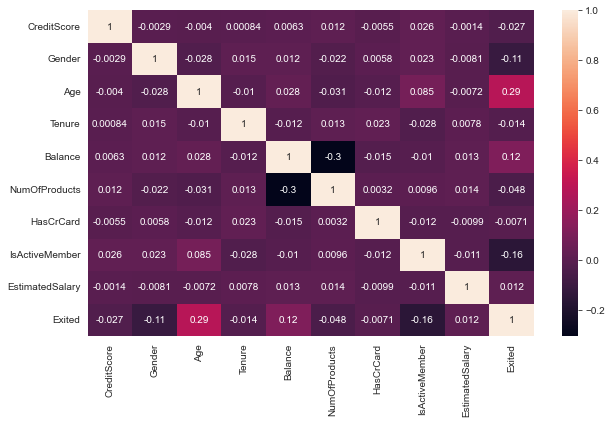

In [36]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Exited', ylabel='count'>

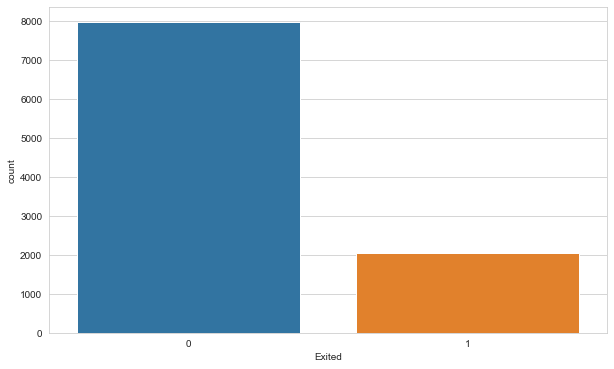

In [37]:
sns.countplot(df.Exited)

In [38]:
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,0.546,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,96.653,0.498,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,350.000,0.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,584.000,0.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,652.000,1.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,718.000,1.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,850.000,1.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


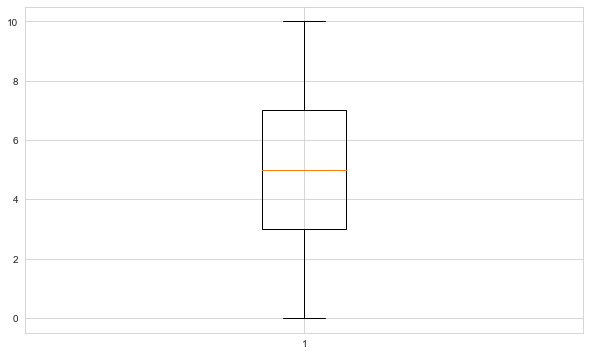

In [41]:
plt.boxplot(df.Tenure);

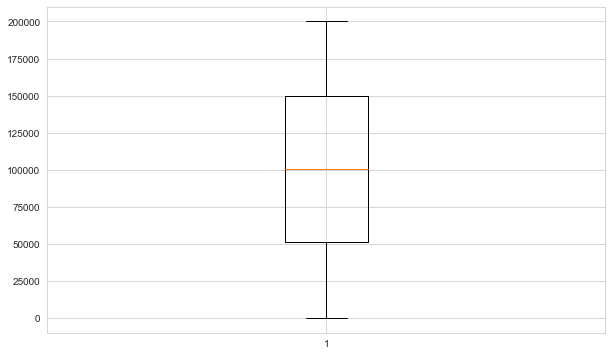

In [43]:
plt.boxplot(df.EstimatedSalary);

## Preprocessing of Data
- Train | Test Split, Scalling

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [59]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [60]:
seed = 42

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.15, random_state = seed)

In [62]:
scaler = MinMaxScaler()

In [63]:
X_train= scaler.fit_transform(X_train)

In [64]:
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [66]:
X_train.shape

(8500, 11)

In [67]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [68]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.5533 - accuracy: 0.7401 - val_loss: 0.4839 - val_accuracy: 0.8000
Epoch 2/1000
240/240 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7959 - val_loss: 0.4694 - val_accuracy: 0.8000
Epoch 3/1000
240/240 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.7962 - val_loss: 0.4578 - val_accuracy: 0.8012
Epoch 4/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.4415 - accuracy: 0.8101 - val_loss: 0.4482 - val_accuracy: 0.8165
Epoch 5/1000
240/240 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8131 - val_loss: 0.4451 - val_accuracy: 0.8082
Epoch 6/1000
240/240 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8137 - val_loss: 0.4394 - val_accuracy: 0.8141
Epoch 7/1000
240/240 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.8145 - val_loss: 0.4365 - val_accuracy:

In [69]:
model.evaluate(X_test, y_test, verbose=0)

[0.4094759523868561, 0.8519999980926514]

In [70]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1116   78]
 [ 144  162]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1194
           1       0.68      0.53      0.59       306

    accuracy                           0.85      1500
   macro avg       0.78      0.73      0.75      1500
weighted avg       0.84      0.85      0.85      1500



In [72]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

""


In [76]:
model.history.history

{}

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                216       
                                                                 
 dense_1 (Dense)             (None, 18)                342       
                                                                 
 dense_2 (Dense)             (None, 11)                209       
                                                                 
 dense_3 (Dense)             (None, 1)                 12        
                                                                 
Total params: 779
Trainable params: 779
Non-trainable params: 0
_________________________________________________________________


### Creating Model

### without class_weigth

#### Evaluate

### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [77]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [78]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1, class_weight={0:1, 1:4})

Epoch 1/1000
240/240 [==============================] - 1s 3ms/step - loss: 1.0885 - accuracy: 0.4511 - val_loss: 0.6783 - val_accuracy: 0.6188
Epoch 2/1000
240/240 [==============================] - 0s 2ms/step - loss: 0.9985 - accuracy: 0.6603 - val_loss: 0.6151 - val_accuracy: 0.6800
Epoch 3/1000
240/240 [==============================] - 1s 3ms/step - loss: 0.9494 - accuracy: 0.6852 - val_loss: 0.6003 - val_accuracy: 0.6859
Epoch 4/1000
240/240 [==============================] - 0s 2ms/step - loss: 0.9082 - accuracy: 0.7148 - val_loss: 0.5598 - val_accuracy: 0.7200
Epoch 5/1000
240/240 [==============================] - 0s 2ms/step - loss: 0.8682 - accuracy: 0.7427 - val_loss: 0.5591 - val_accuracy: 0.7224
Epoch 6/1000
240/240 [==============================] - 0s 2ms/step - loss: 0.8270 - accuracy: 0.7586 - val_loss: 0.5470 - val_accuracy: 0.7365
Epoch 7/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.7988 - accuracy: 0.7681 - val_loss: 0.5470 - val_accuracy:

<AxesSubplot:>

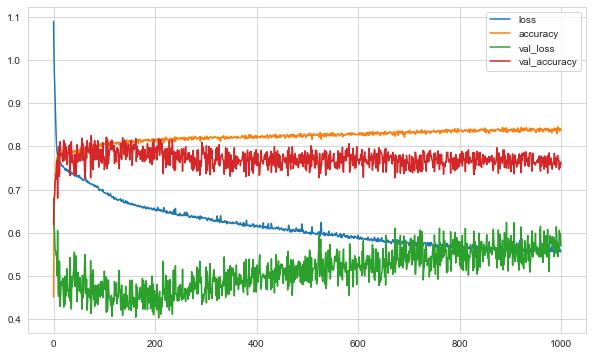

In [79]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [80]:
model.evaluate(X_test, y_test, verbose=0)

[0.5669482946395874, 0.7726666927337646]

#### Evaluate

## GridSearchCV

In [81]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [82]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 11, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [84]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [85]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
120/120 [==============================] - 17s 43ms/step - loss: 0.5327 - accuracy: 0.7599 - val_loss: 0.4748 - val_accuracy: 0.8000
Epoch 2/200
120/120 [==============================] - 2s 21ms/step - loss: 0.4629 - accuracy: 0.7959 - val_loss: 0.4586 - val_accuracy: 0.8000
Epoch 3/200
120/120 [==============================] - 2s 13ms/step - loss: 0.4422 - accuracy: 0.8038 - val_loss: 0.4499 - val_accuracy: 0.8118
Epoch 4/200
120/120 [==============================] - 2s 19ms/step - loss: 0.4270 - accuracy: 0.8180 - val_loss: 0.4367 - val_accuracy: 0.8247
Epoch 5/200
120/120 [==============================] - 1s 8ms/step - loss: 0.4165 - accuracy: 0.8210 - val_loss: 0.4238 - val_accuracy: 0.8235
Epoch 6/200
120/120 [==============================] - 1s 9ms/step - loss: 0.3913 - accuracy: 0.8371 - val_loss: 0.3728 - val_accuracy: 0.8588
Epoch 7/200
120/120 [==============================] - 1s 6ms/step - loss:

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000029CFDC5F880>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

0.8603529411764705

#### Evaluate

In [87]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.003,
 'optimizer': keras.optimizer_v2.adam.Adam}

In [88]:
grid_model.best_score_

0.8603529411764705

## Final Model and Model Deployment

In [102]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [92]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(11, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.003)
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [93]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [94]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
133/133 [==============================] - 1s 3ms/step - loss: 0.5944 - accuracy: 0.6994 - val_loss: 0.4952 - val_accuracy: 0.7960
Epoch 2/1000
133/133 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7964 - val_loss: 0.4742 - val_accuracy: 0.7960
Epoch 3/1000
133/133 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7964 - val_loss: 0.4646 - val_accuracy: 0.7960
Epoch 4/1000
133/133 [==============================] - 0s 2ms/step - loss: 0.4576 - accuracy: 0.7964 - val_loss: 0.4534 - val_accuracy: 0.7973
Epoch 5/1000
133/133 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.8054 - val_loss: 0.4439 - val_accuracy: 0.8080
Epoch 6/1000
133/133 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.8141 - val_loss: 0.4393 - val_accuracy: 0.8013
Epoch 7/1000
133/133 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8129 - val_loss: 0.4355 - val_accuracy:

<AxesSubplot:>

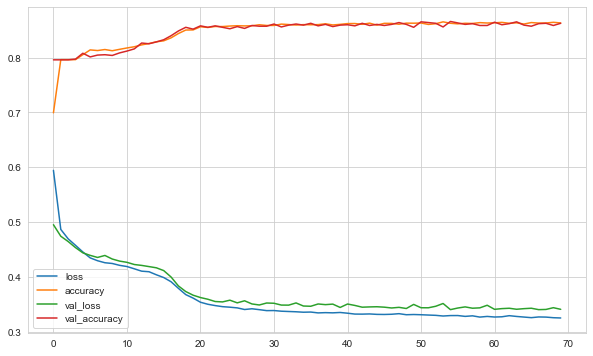

In [95]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [96]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3408642113208771
accuracy :  0.862666666507721


In [97]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1153   41]
 [ 165  141]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1194
           1       0.77      0.46      0.58       306

    accuracy                           0.86      1500
   macro avg       0.82      0.71      0.75      1500
weighted avg       0.85      0.86      0.85      1500



In [98]:
model.save('churn_model.h5')

In [99]:
from tensorflow.keras.models import load_model

In [103]:
model_churn = load_model('churn_model.h5')
scaler_churn = pickle.load(open("scaler_cancer", "rb"))

### Prediction

In [105]:
single_patient = df.drop('Exited', axis = 1).iloc[11:12, :]
single_patient

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
11,497,1,24,3,0.000,2,1,0,76390.010,0,1


In [106]:
single_patient = scaler_churn.transform(single_patient)
single_patient

array([[0.294     , 1.        , 0.08108108, 0.3       , 0.        ,
        0.33333333, 1.        , 0.        , 0.38192862, 0.        ,
        1.        ]])

In [107]:
(model_churn.predict(single_patient) > 0.5).astype("int32")

array([[0]])

In [108]:
df["Exited"].iloc[12]

0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___